In [ ]:
### Celda para ejecutar en google Colab

from google.colab import drive
import os
drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/Multiples_anotadores/Pruebas/models'

os.chdir(root_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#!pip install tf-nightly
from MA_regression import *
from sklearn.metrics import r2_score

In [ ]:
database = 'yacht' #['auto', 'Bike', 'concrete', 'ct', 'housing', 'yacht']
#sh_ind = loadmat('/content/gdrive/My Drive/Multiples_anotadores/data/shuffled_index_'+database+'.mat')['sh_ind']
data_path = '/content/gdrive/My Drive/Multiples_anotadores/data/' + database +'.mat' 
data = loadmat(data_path)
#heads = data['MAData'].dtype
itr = data['idxtr'].astype(int)
ite = data['idxte'].astype(int)
X = data['X']
t = data['y']
Y = data['Y']
res = np.zeros(30)
for i in range(30):
  
  Xtrain, Ytrain, ttrain = X[itr[:,i]], Y[itr[:,i]], t[itr[:,i]]
  Xtest, Ytest, ttest = X[ite[:,i]], Y[ite[:,i]], t[ite[:,i]]

  scaler = StandardScaler()
  scaler.fit(Xtrain)
  Xtrain = scaler.transform(Xtrain)
  Xtest = scaler.transform(Xtest)

  R = Y.shape[1] 
  N = X.shape[0]
  N_train = Xtrain.shape[0]
  N_test = Xtest.shape[0]
  P = X.shape[1]
  K = 1

  auxY = Ytrain.flatten()[:, np.newaxis].copy()
  scalerY = scaler.fit(Ytrain.flatten()[:, np.newaxis])
  Ytrain = scalerY.fit_transform(Ytrain.flatten()[:, np.newaxis]).reshape((N_train,R))
  Ytest = scalerY.fit_transform(Ytest.flatten()[:, np.newaxis]).reshape((N_test,R))

  Xtrainf = np.concatenate((Xtrain, Ytrain),1)
  Xtestf = np.concatenate((Xtest, Ytest),1)

  model = Keras_MA_pi_kern(K=K, R=R, P=P, epochs=150, batch_size=min(256, N_train), 
                          validation_split=0, learning_rate=0.01, ratio_lin=0.5,
                          ratio=1.3, verbose=0, scale=1, RBFout=R+1,
                          l1=0.01, l2=0.01, seed=100, optimizer='RMS', 
                          dropout=True, BN=True)

  model.fit(Xtrainf, np.zeros(ttrain.shape))

  y_probas = np.stack([model.model(Xtestf[:,:P], training=True)[:,:K] # se activa training en True para que el Dropout se aplique
                      for sample in range(100)])

  pred = scalerY.inverse_transform(np.mean(y_probas, axis=0))
  #pred = np.mean(y_probas, axis=0)
  #pred = scalerY.inverse_transform(model.predict(Xtestf))

  res[i] = r2_score(ttest, pred)
  print(i)
print(np.mean(res))
print(np.std(res))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0.43447770763234234
0.15077487143315704


In [ ]:
pred[-10:]

array([[ 5.362539 ],
       [ 7.749221 ],
       [13.713625 ],
       [ 6.5089154],
       [11.555412 ],
       [ 3.3947604],
       [13.972238 ],
       [ 8.3656225],
       [19.128448 ],
       [21.079294 ]], dtype=float32)

In [ ]:
ttest[-10:]

array([[ 5.19],
       [ 0.29],
       [13.08],
       [ 0.7 ],
       [20.41],
       [ 0.17],
       [51.77],
       [ 1.3 ],
       [35.64],
       [51.5 ]])

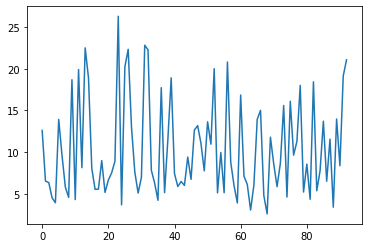

In [ ]:
plt.plot(pred)

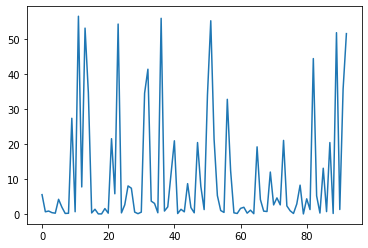

In [ ]:
plt.plot(ttest)

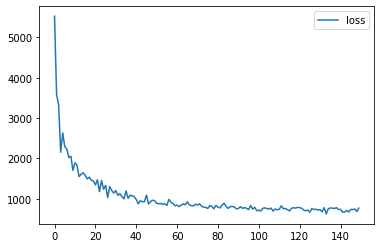

In [ ]:
model.plot_history_loss()

In [ ]:
#ttest.T

In [ ]:
#Yhat = model.predict(Xtestf)
#Yhat

In [ ]:
#model.score(Xtestf, ttest)

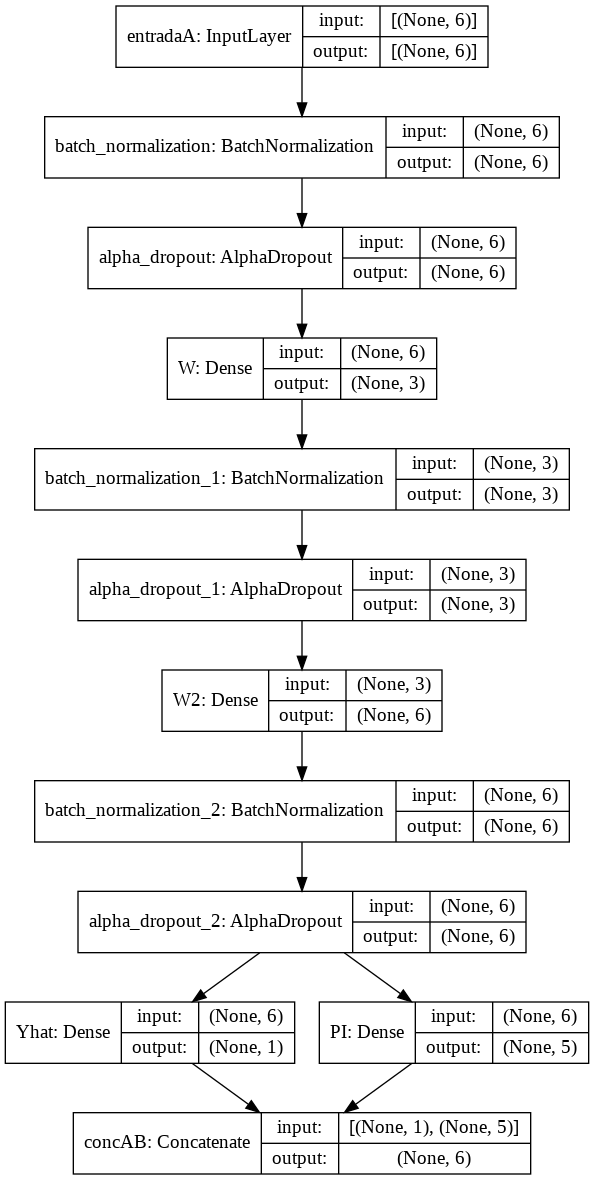

In [ ]:
tf.keras.utils.plot_model(model.model, show_shapes=True)

In [ ]:
model

Keras_MA_pi_kern(BN=True, K=1, P=6, R=5, RBFout=6, batch_size=215, dropout=True,
                 epochs=150, l1=0.01, l2=0.01, learning_rate=0.01,
                 optimizer='RMS', ratio=1.3, ratio_lin=0.5, scale=1, seed=100,
                 validation_split=0, verbose=0, w_init='PCA')

In [ ]:
y_probas = np.stack([model.model(Xtestf[:,:P], training=True)[:,K:] # se activa training en True para que el Dropout se aplique
                     for sample in range(100)])

#pred = scalerY.inverse_transform(np.mean(y_probas, axis=0))
pred2 = np.mean(y_probas,0)